In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [4]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

OUTPUT_DIR = '/n/regal/pfister_lab/PERCEPTION/DATA/Figure1_Direction/'
if not os.path.exists(OUTPUT_DIR):
  os.makedirs(OUTPUT_DIR)

In [22]:
import skimage.draw
img = np.zeros((100,100), dtype=np.bool)
start = (50,50)
angle = np.random.randint(360)
theta = -(np.pi / 180.0) * angle
length = 30
end = (start[0] - length * np.cos(theta), start[1] - length * np.sin(theta))

46


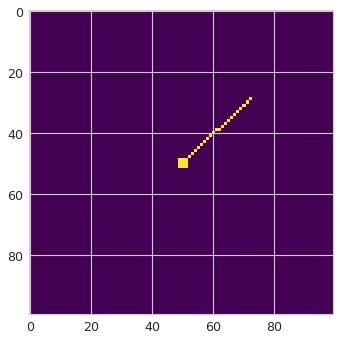

In [23]:
rr, cc = skimage.draw.line(start[0], start[1], int(np.round(end[0])), int(np.round(end[1])))
img[rr, cc] = 1

half_spot_size = 1

img[start[0]-half_spot_size:start[0]+half_spot_size+1, start[1]-half_spot_size:start[1]+half_spot_size+1] = 1

imshow(img)
print angle

# Dataset 1

We create a very simple dataset with a random length.

In [61]:
#
# CREATE SINGLE DATAPOINT
#
fig = C.Figure1_Length()
fig.create(verbose=True)

#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints)
print 'Image Generation done in', time.time()-t0, 'seconds'

# Parameters 40
Creating Datapoints done in 1.1266849041 seconds
Image Generation done in 1.1853749752 seconds


In [62]:
fig.to_sparse()

([50, 50, 33, 1], 33)

Datapoint 41419
Label 29 ( 29 )


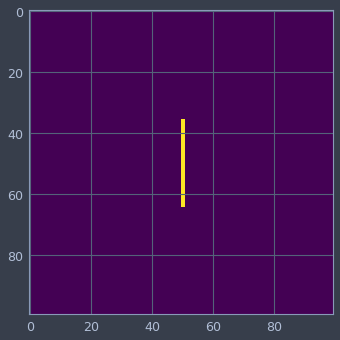

In [73]:
#
# RANDOM VISUALIZATION
#
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX], '(', datapoints[INDEX][2], ')'

im = plt.imshow(images[INDEX])



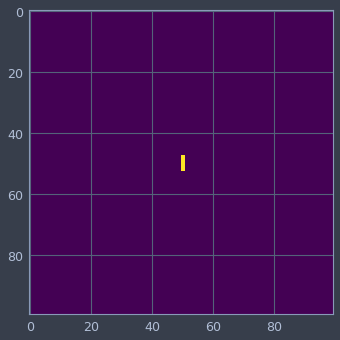

In [74]:
#
# DATA AS RAVELED NUMPY 2D ARRAY
#
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

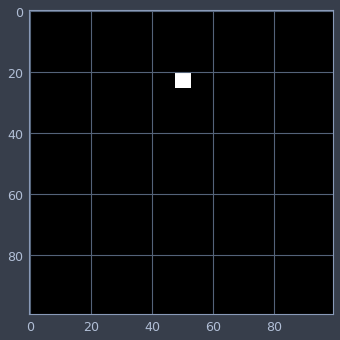

In [6]:
#
# WE ALSO NEED THE DATA AS A 3D NUMPY ARRAY (RAVELED)
#
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

In [7]:
INDEX = 1

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
#np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d numpy'

#
#
# OTHER CLASSIFIERS AS FEATURE GENERATORS
#
#
import keras.applications
X = images_3d_raveled.reshape(100000,100,100,3)


VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features done after', time.time()-t0

np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)


stored datapoints
stored labels
storeds image arrays 2d/3d numpy


Using TensorFlow backend.


100000/100000 [==============================] - 275s 3ms/step
VGG19 features done after 275.396472931
100000/100000 [==============================] - 219s 2ms/step
Xception features done after 219.240185022


# Dataset 2
We add Y variability.

This means, we not only vary the origin but also the Y coordinate.

In [4]:
#
# CREATE SINGLE DATAPOINT
#
fig = C.Figure1_Position_Nonaligned_Scale(variable_y=True)
fig.create(verbose=True)

#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints)
print 'Image Generation done in', time.time()-t0, 'seconds'

# Parameters 610
Creating Datapoints done in 1.58408117294 seconds
Image Generation done in 1.31741404533 seconds


Datapoint 58286
Label 54 ( [7, 0] )


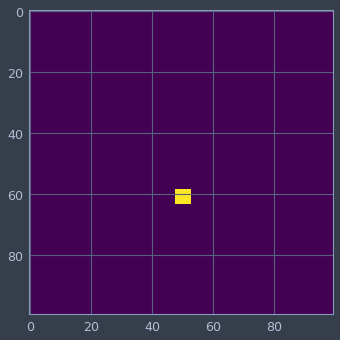

In [7]:
#
# RANDOM VISUALIZATION
#
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX], '(', datapoints[INDEX][2], ')'

imshow(images[INDEX])

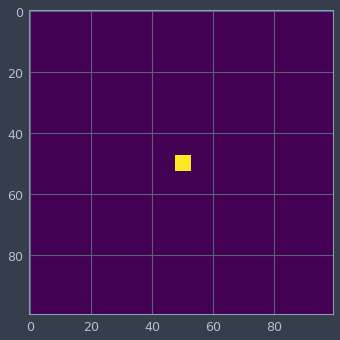

In [21]:
#
# DATA AS RAVELED NUMPY 2D ARRAY
#
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

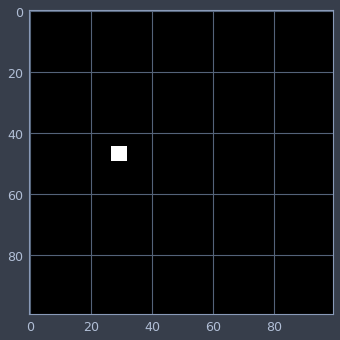

In [11]:
#
# WE ALSO NEED THE DATA AS A 3D NUMPY ARRAY (RAVELED)
#
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

In [12]:
INDEX = 2

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
#np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d numpy'

#
#
# OTHER CLASSIFIERS AS FEATURE GENERATORS
#
#
import keras.applications
X = images_3d_raveled.reshape(100000,100,100,3)


VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features done after', time.time()-t0

np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)


stored datapoints
stored labels
storeds image arrays 2d/3d numpy
100000/100000 [==============================] - 279s 3ms/step
VGG19 features done after 278.567987919
100000/100000 [==============================] - 221s 2ms/step
Xception features done after 220.780169964


# Dataset 3
We add also variable X in addition to origin and Y variability.

In [11]:
#
# CREATE SINGLE DATAPOINT
#
fig = C.Figure1_Position_Nonaligned_Scale(variable_y=True,variable_x=True)
fig.create(verbose=True)

#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints)
print 'Image Generation done in', time.time()-t0, 'seconds'

# Parameters 37210
Creating Datapoints done in 2.16928505898 seconds
Image Generation done in 1.32499599457 seconds


Datapoint 80494
Label 61


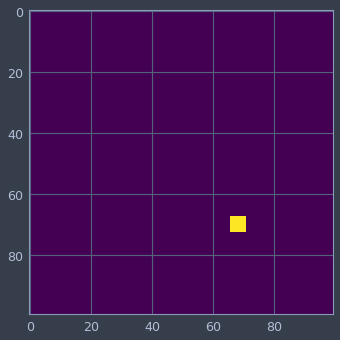

In [12]:
#
# RANDOM VISUALIZATION
#
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

imshow(images[INDEX])

In [ ]:
#
# DATA AS RAVELED NUMPY 2D ARRAY
#
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

In [ ]:
#
# WE ALSO NEED THE DATA AS A 3D NUMPY ARRAY (RAVELED)
#
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

In [ ]:
INDEX = 3

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
#np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d numpy'

#
#
# OTHER CLASSIFIERS AS FEATURE GENERATORS
#
#
import keras.applications
X = images_3d_raveled.reshape(100000,100,100,3)


VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features done after', time.time()-t0

np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)


# Dataset 4
We add also variable spot size in addition to X and Y variability.

This means, we not only vary the X and the Y coordinates, but also the spot size. And of course the origin.

In [9]:
#
# CREATE SINGLE DATAPOINT
#
fig = C.Figure1_Position_Nonaligned_Scale(variable_y=True,variable_x=True, variable_spot_size=True)
fig.create(verbose=True)

#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints)
print 'Image Generation done in', time.time()-t0, 'seconds'

# Parameters 223260
Creating Datapoints done in 3.00513100624 seconds
Image Generation done in 1.48831892014 seconds


Datapoint 66736
Label 73


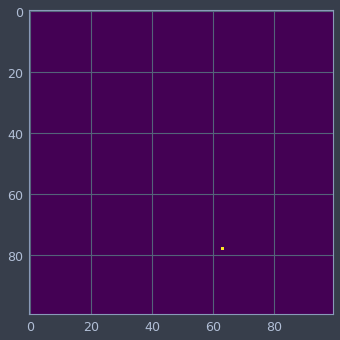

In [10]:
#
# RANDOM VISUALIZATION
#
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

imshow(images[INDEX])

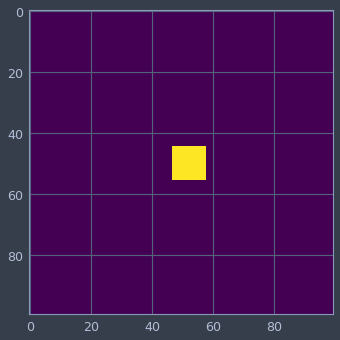

In [15]:
#
# DATA AS RAVELED NUMPY 2D ARRAY
#
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

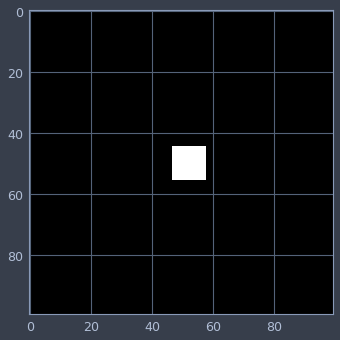

In [16]:
#
# WE ALSO NEED THE DATA AS A 3D NUMPY ARRAY (RAVELED)
#
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

In [17]:
INDEX = 4

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
#np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d numpy'

#
#
# OTHER CLASSIFIERS AS FEATURE GENERATORS
#
#
import keras.applications
X = images_3d_raveled.reshape(100000,100,100,3)


VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features done after', time.time()-t0

np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)


stored datapoints
stored labels
storeds image arrays 2d/3d numpy
100000/100000 [==============================] - 279s 3ms/step
VGG19 features done after 279.325987101
100000/100000 [==============================] - 221s 2ms/step
Xception features done after 220.716153145
